# Moving Average

## Import Necessary Packages

In [1]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Simulate Moving Average(2) process 

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [2]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [3]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

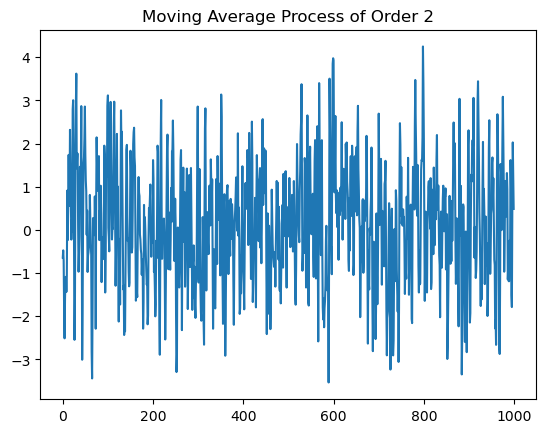

In [4]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

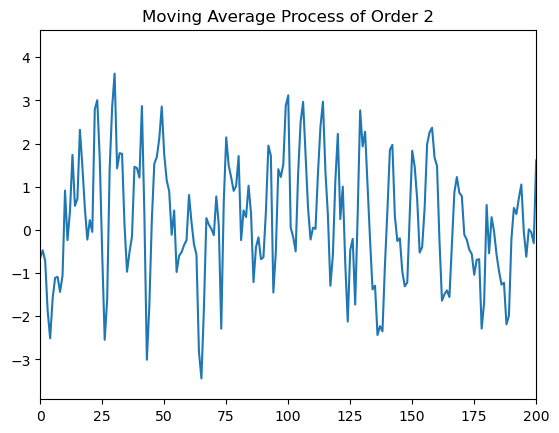

In [5]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

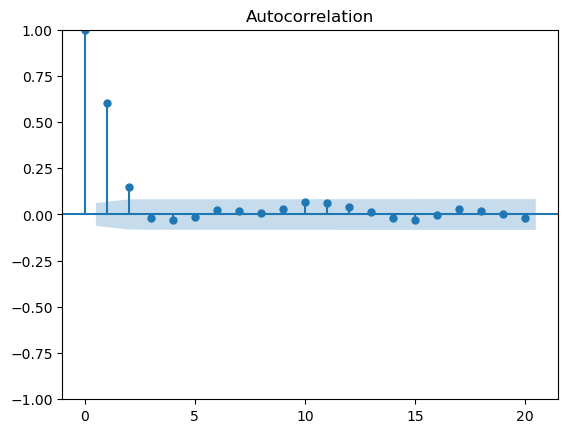

In [6]:
plot_acf(MA2_process, lags=20);

## Stationary Check Point

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(MA2_process)
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: -14.876450471198106
p-value: 1.6337896046031407e-27
Critial Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}
Series is Stationary


## Moving Average Model

In [8]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1418.162
Date:                Fri, 16 Aug 2024   AIC                           2844.324
Time:                        15:11:34   BIC                           2863.943
Sample:                             0   HQIC                          2851.782
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1178      0.069      1.718      0.086      -0.017       0.252
ma.L1          0.8721      0.029     30.109      0.000       0.815       0.929
ma.L2          0.2823      0.030      9.305      0.0

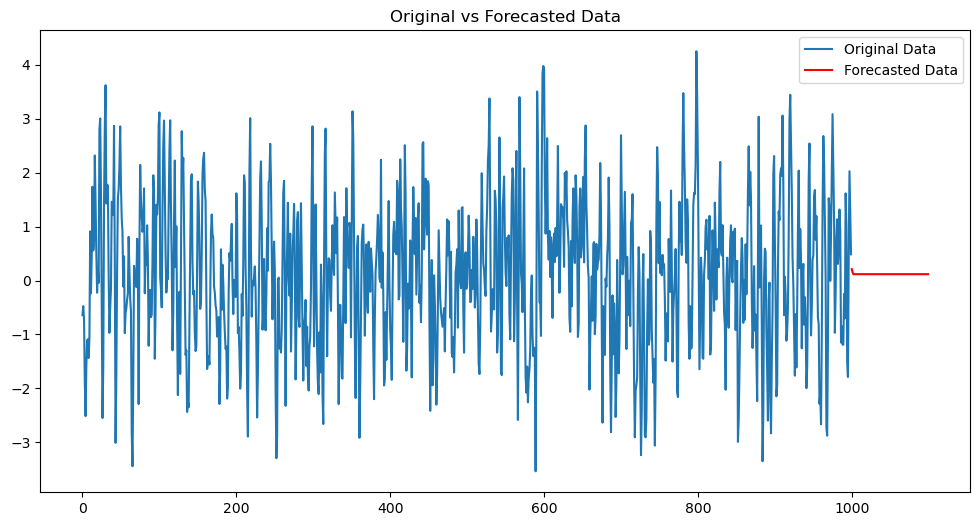

In [9]:
# Predict the next 100 points
forecast = MA_model.get_forecast(steps=100)
forecast_values = forecast.predicted_mean


# Plot the forecast with the original data
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(MA2_process, label='Original Data')

# Plot the forecasted data
plt.plot(range(len(MA2_process), len(MA2_process) + 100), forecast_values, label='Forecasted Data', color='red')


plt.legend()
plt.title('Original vs Forecasted Data')
plt.show()


In [10]:
len(forecast.predicted_mean)

100

In [11]:
dir(MA_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_data_in_cache',
 '_fixed_params',
 '_fixed_params_index',
 '_free_params_index',
 '_get_previous_updated',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_has_fixed_params',
 '_init_kwds',
 '_news_previous_data',
 '_news_previous_results',
 '_news_updated_data',
 '_news_updated_results',
 '_params_ar',
 '_params_exog',
 '_params_ma',
 '_params_seasonal_ar',
 '_params_se

In [12]:
from sklearn.metrics import mean_squared_error
prediction = MA_model.get_prediction(start=0, end=len(MA2_process)-1)
predicted_values = prediction.predicted_mean

mse = mean_squared_error(MA2_process, predicted_values)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1.006919429526855
RMSE: 1.0034537505669383


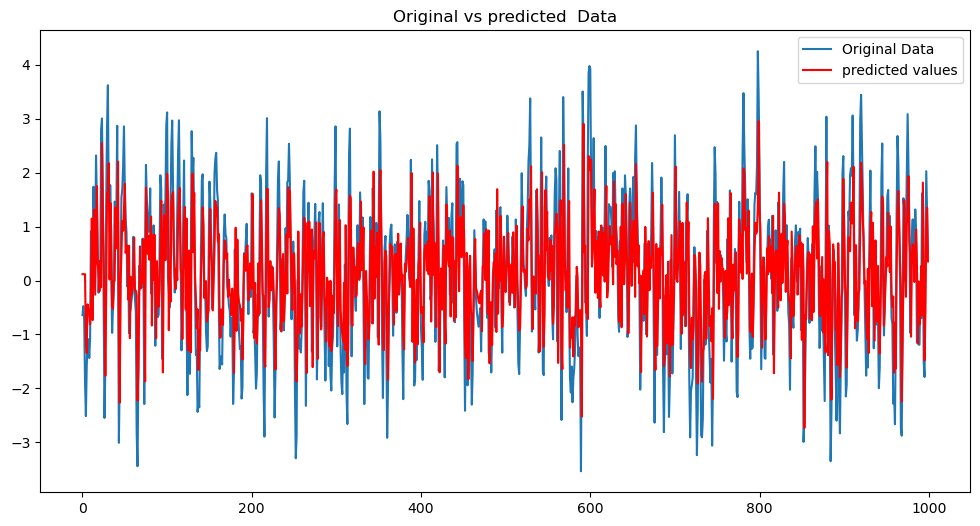

In [13]:
# Plot the forecast with the original data
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(MA2_process, label='Original Data')

# Plot the forecasted data
plt.plot(predicted_values ,label='predicted values', color='red')


plt.legend()
plt.title('Original vs predicted  Data')
plt.show()